### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load and Preprocess the data for Training

In [2]:
train_df = pd.read_excel('Mining-Data.xlsx', sheet_name='My_Training_Data70')
test_df = pd.read_excel('Mining-Data.xlsx', sheet_name='Testing_30')


X_train = train_df.drop('Recovery(%)', axis=1)
y_train = train_df[['Recovery(%)']]
X_test = test_df.drop('Recovery(%)', axis = 1)
y_test = test_df[['Recovery(%)']]

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)


y_train_normalized = scaler_Y.fit_transform(y_train)
y_test_normalized = scaler_Y.transform(y_test)

### Model Creation and Development

In [3]:
poly_features = PolynomialFeatures(degree=1)
X_train_poly = poly_features.fit_transform(X_train_normalized)
X_test_poly = poly_features.transform(X_test_normalized)

In [4]:
model = LinearRegression()
model.fit(X_train_poly, y_train_normalized)

LinearRegression()

### Intercept and Coefficients
#### NB: Each coefficient corresponds directly to the features in the DataFrame

In [5]:
model.intercept_, model.coef_
print(f"Model Intercept: {model.intercept_[0]}")
print(f"Model Coefficient: {model.coef_[0]}")

Model Intercept: 0.3666783192776811
Model Coefficient: [ 0.         -0.18372815  0.48856085  0.54176645  0.22409919 -0.1865989
  0.28675384  0.22529308 -0.21903143 -0.73482365]


### Performance Metrics using the trained model on the test set

In [6]:
y_pred_scaled = model.predict(X_test_poly)
y_pred_original = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1, 1))

In [7]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_original)


print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R²): {r2}")


Root Mean Squared Error: 0.6408539648247245
R-squared (R²): 0.5572068348770218


### Compare the Predicted and Actual Values

In [8]:
compare_df = pd.DataFrame(y_pred_original, columns = ['Predicted'])
compare_df['Actual'] = y_test

##### A small peek into the predicted and actual values

In [9]:
compare_df.head(10)

,Predicted,Actual
0,90.267205,89.959033
1,90.608760,90.590392
2,89.141227,88.761667
3,89.642267,90.777612
4,90.280037,90.116769
5,90.339609,90.428091
6,90.891033,91.709526
7,88.763695,89.376526
8,91.033687,90.828132
9,90.355306,90.003263


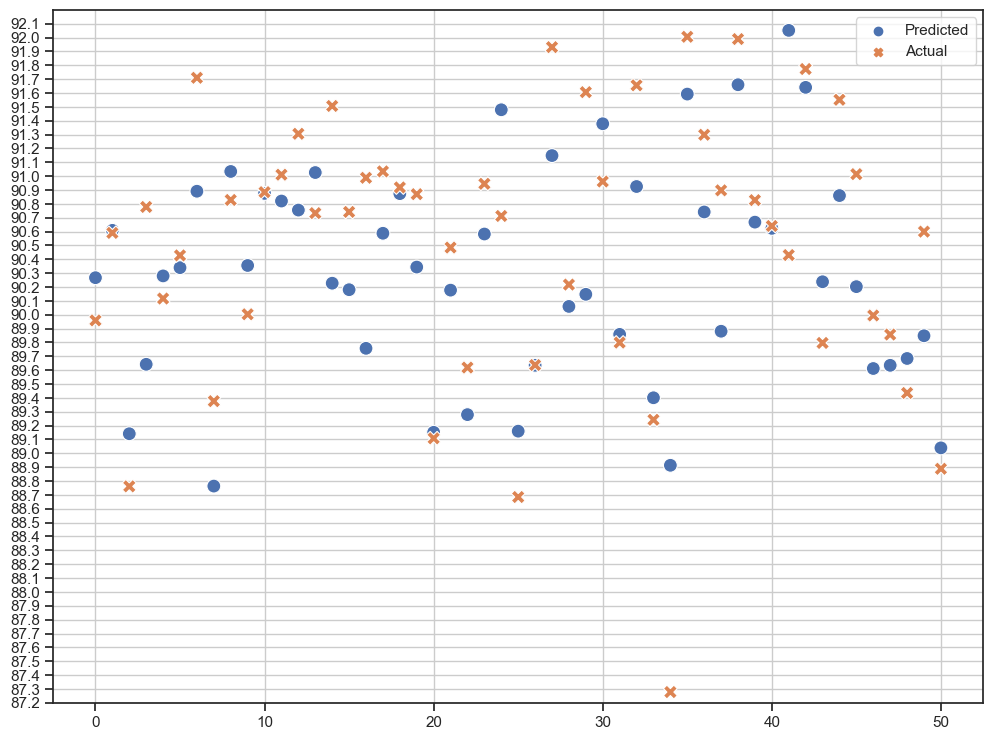

In [10]:
plt.figure(figsize=(12,9))
sns.set(style='ticks')

y_ticks = np.arange(87.2, 92.2, 0.1)
plt.ylim(87.2, 92.2)
plt.yticks(y_ticks)

sns.scatterplot(compare_df, s=100)
plt.grid(True)